# Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calmap
import math
import datetime as dt
import squarify
import warnings
warnings.filterwarnings('ignore')

## Load Files: All

In [2]:
customerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', header=1)
customerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', header=1)
transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)

### File: Customer Address

In [3]:
customerAddress

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


### File: Customer Demographic

In [4]:
customerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


### File: Transactions

In [5]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


### Join Tables

In [6]:
df = pd.merge(customerDemographic, customerAddress, on='customer_id', how='left')
df = pd.merge(df, transactions, on='customer_id', how='left')
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20499,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20500,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20501,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20502,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Refactoring

#### Column Gender

In [7]:
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [8]:
df['gender'][df['gender'] == 'F'] = 'Female'
df['gender'][df['gender'] == 'Femal'] = 'Female'
df['gender'][df['gender'] == 'M'] = 'Male'

In [9]:
print(df['gender'].unique())
print(df['gender'].mode())

['Female' 'Male' 'U']
0    Female
dtype: object


In [10]:
df['gender'][df['gender'] == 'U'] = df['gender'].mode()[0]

In [11]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Column state

In [12]:
df['state'].unique()

array(['New South Wales', nan, 'QLD', 'VIC', 'NSW', 'Victoria'],
      dtype=object)

In [13]:
df['state'][df['state'] == 'New South Wales'] = 'NSW'
df['state'][df['state'] == 'Victoria'] = 'VIC'

In [14]:
df['state'].unique()

array(['NSW', nan, 'QLD', 'VIC'], dtype=object)

#### Column product_first_sold_date

In [15]:
df['product_first_sold_date']

0        38482.0
1        39526.0
2        37823.0
3        37873.0
4        38573.0
          ...   
20499        NaN
20500        NaN
20501        NaN
20502        NaN
20503        NaN
Name: product_first_sold_date, Length: 20504, dtype: float64

In [16]:
# https://www.xspdf.com/resolution/51580881.html
df['product_first_sold_date'] = pd.TimedeltaIndex(df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
df['product_first_sold_date'].head()

0   2005-05-12
1   2008-03-21
2   2003-07-23
3   2003-09-11
4   2005-08-11
Name: product_first_sold_date, dtype: datetime64[ns]

### Info Dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  int64         
 1   first_name                           20504 non-null  object        
 2   last_name                            19849 non-null  object        
 3   gender                               20504 non-null  object        
 4   past_3_years_bike_related_purchases  20504 non-null  int64         
 5   DOB                                  20047 non-null  datetime64[ns]
 6   job_title                            18027 non-null  object        
 7   job_industry_category                17180 non-null  object        
 8   wealth_segment                       20504 non-null  object        
 9   deceased_indicator                   20504 non-null  object        
 10  default   

### Remove columns not needed for analysis

In [18]:
df.drop(['first_name', 'last_name', 'default', 'address'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  int64         
 1   gender                               20504 non-null  object        
 2   past_3_years_bike_related_purchases  20504 non-null  int64         
 3   DOB                                  20047 non-null  datetime64[ns]
 4   job_title                            18027 non-null  object        
 5   job_industry_category                17180 non-null  object        
 6   wealth_segment                       20504 non-null  object        
 7   deceased_indicator                   20504 non-null  object        
 8   owns_car                             20504 non-null  object        
 9   tenure                               20047 non-null  float64       
 10  postcode  

### Missing Values

In [19]:
df.isna().sum()

customer_id                               0
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     457
job_title                              2477
job_industry_category                  3324
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  457
postcode                                 29
state                                    29
country                                  29
property_valuation                       29
transaction_id                          507
product_id                              507
transaction_date                        507
online_order                            867
order_status                            507
brand                                   704
product_line                            704
product_class                           704
product_size                    

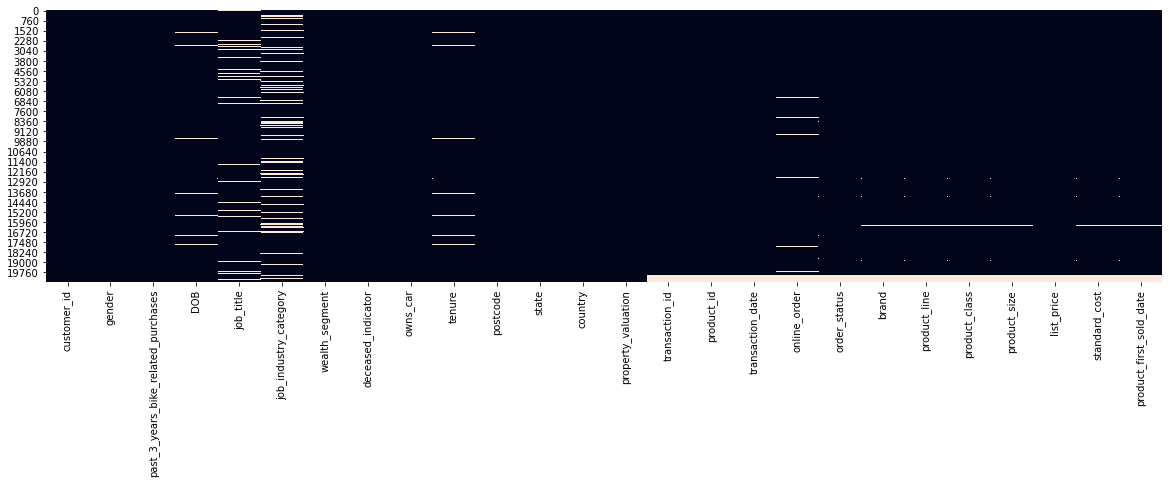

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Fill gaps with the mode

In [21]:
df['job_title'].fillna(df['job_title'].mode()[0], inplace=True)
df['job_industry_category'].fillna(df['job_industry_category'].mode()[0], inplace=True)
df['tenure'].fillna(df['tenure'].mode()[0], inplace=True)
df['postcode'].fillna(df['postcode'].mode()[0], inplace=True)
df['state'].fillna(df['state'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['property_valuation'].fillna(df['property_valuation'].mode()[0], inplace=True)
df['online_order'].fillna(df['online_order'].mode()[0], inplace=True)
df['order_status'].fillna(df['order_status'].mode()[0], inplace=True)
df['brand'].fillna(df['order_status'].mode()[0], inplace=True)
df['product_line'].fillna(df['product_line'].mode()[0], inplace=True)
df['product_class'].fillna(df['product_class'].mode()[0], inplace=True)
df['product_size'].fillna(df['product_size'].mode()[0], inplace=True)
df['list_price'].fillna(df['list_price'].mode()[0], inplace=True)
df['product_size'].fillna(df['product_size'].mode()[0], inplace=True)
df['standard_cost'].fillna(df['standard_cost'].mode()[0], inplace=True)

In [22]:
df.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    457
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                         507
product_id                             507
transaction_date                       507
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price 

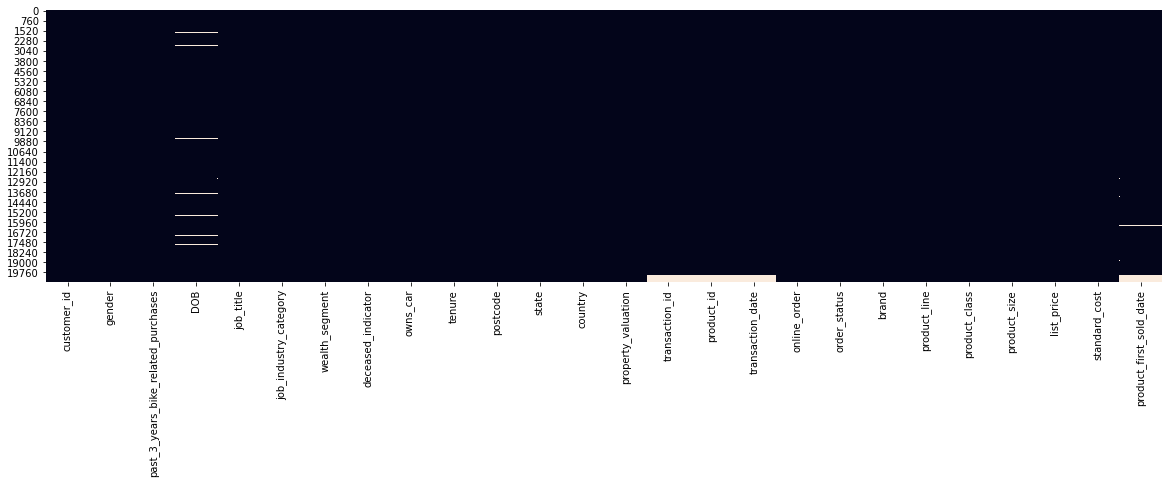

In [23]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Drop the rest of missing values

In [24]:
df.dropna(inplace=True)

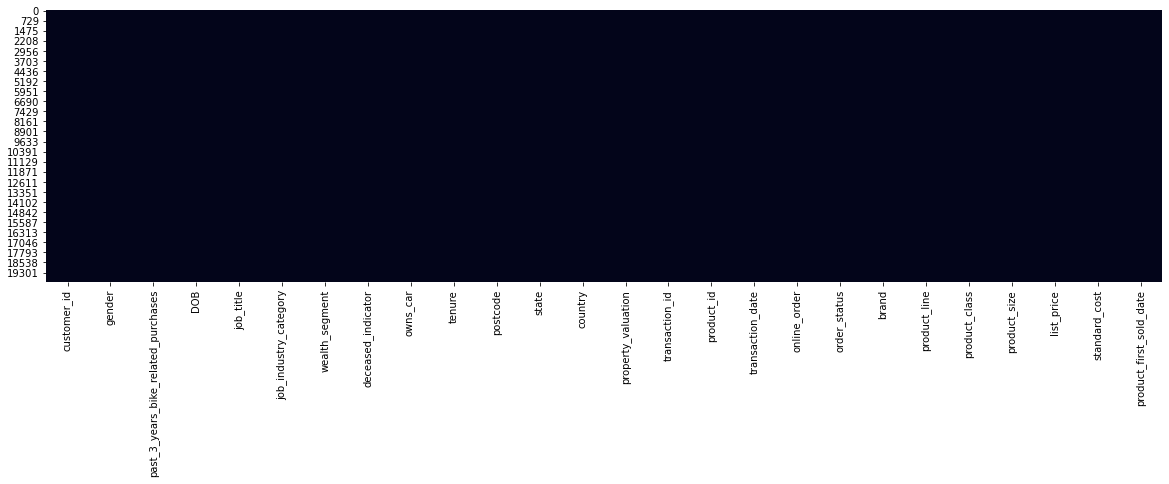

In [25]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Refactoring

#### Column Age

In [26]:
df['Age'] = 2021 - df['DOB'].dt.year

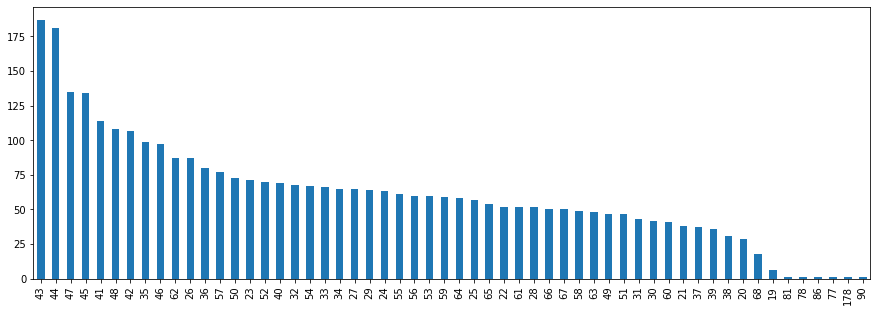

In [27]:
plt.figure(figsize=(15,5))
df[['customer_id', 'Age']].drop_duplicates(keep='first')['Age'].value_counts().plot.bar()
plt.show()

In [28]:
df.drop(df['Age'][df['Age'] > 100].index.values, axis=0, inplace=True)

In [29]:
df.drop(['DOB'], axis=1, inplace=True)

In [30]:
lst = []
for i in df['Age'].values:
    if i < 30:
        lst.append('20+')
    elif i < 40:
        lst.append('30+')
    elif i < 50:
        lst.append('40+')  
    elif i < 60:
        lst.append('50+')       
    else:
        lst.append('60+')                    
df['Age_C'] = lst

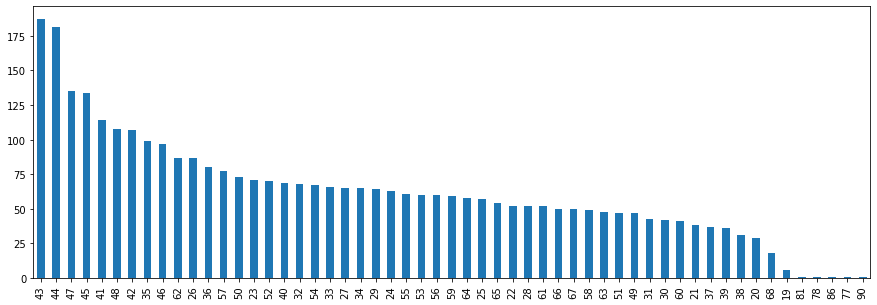

In [31]:
plt.figure(figsize=(15,5))
df[['customer_id', 'Age']].drop_duplicates(keep='first')['Age'].value_counts().plot.bar()
plt.show()

#### Column Profit

In [32]:
df['Profit'] = df['list_price'] - df['standard_cost']

#### Columns last purchase

In [33]:
most_recent_purchase = df['transaction_date'].max()
df['last_purchase_days_ago'] = most_recent_purchase - df['transaction_date']

#### Column Order Status

In [34]:
df.drop(df['order_status'][df['order_status'] == 'Cancelled'].index.values, axis=0, inplace=True)

#### Dataframe Global

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19178 entries, 0 to 20003
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          19178 non-null  int64          
 1   gender                               19178 non-null  object         
 2   past_3_years_bike_related_purchases  19178 non-null  int64          
 3   job_title                            19178 non-null  object         
 4   job_industry_category                19178 non-null  object         
 5   wealth_segment                       19178 non-null  object         
 6   deceased_indicator                   19178 non-null  object         
 7   owns_car                             19178 non-null  object         
 8   tenure                               19178 non-null  float64        
 9   postcode                             19178 non-null  float64        
 10

In [36]:
df

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,...,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,Age_C,Profit,last_purchase_days_ago
0,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,...,Standard,medium,medium,235.63,125.07,2005-05-12,68,60+,110.56,7 days
1,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,...,Standard,medium,medium,1577.53,826.51,2008-03-21,68,60+,751.02,268 days
2,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,...,Road,low,small,1720.70,1531.42,2003-07-23,68,60+,189.28,233 days
3,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,...,Standard,medium,medium,360.40,270.30,2003-09-11,68,60+,90.10,359 days
4,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,...,Standard,medium,medium,71.49,53.62,2005-08-11,68,60+,17.87,312 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,3500,Female,71,Social Worker,Entertainment,Affluent Customer,N,No,17.0,2100.0,...,Road,medium,medium,792.90,594.68,1992-10-04,54,50+,198.22,355 days
20000,3500,Female,71,Social Worker,Entertainment,Affluent Customer,N,No,17.0,2100.0,...,Standard,medium,medium,1228.07,400.91,2000-05-24,54,50+,827.16,317 days
20001,3500,Female,71,Social Worker,Entertainment,Affluent Customer,N,No,17.0,2100.0,...,Standard,medium,small,1311.44,1167.18,1992-10-13,54,50+,144.26,144 days
20002,3500,Female,71,Social Worker,Entertainment,Affluent Customer,N,No,17.0,2100.0,...,Standard,medium,medium,60.34,45.26,1993-07-17,54,50+,15.08,353 days


## Analysis

### Numerical Analysis

In [37]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,Age,Profit,last_purchase_days_ago
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178
mean,1738.715559,48.977474,10.672437,2987.691000,7.514965,9995.799145,45.776463,0.508916,1106.183674,555.500347,43.859318,550.683327,181 days 11:15:19.428511836
std,1011.067895,28.625909,5.674609,852.175359,2.826290,5773.808575,30.567089,0.499934,583.036275,405.752854,12.619672,493.025900,105 days 09:07:28.102809510
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,19.000000,4.800000,0 days 00:00:00
25%,857.000000,24.000000,6.000000,2200.000000,6.000000,4997.250000,18.000000,0.000000,575.270000,215.140000,34.000000,133.780000,89 days 00:00:00
50%,1734.500000,48.000000,11.000000,2767.000000,8.000000,9994.500000,45.000000,1.000000,1163.890000,507.580000,44.000000,445.210000,180 days 00:00:00
75%,2614.000000,73.000000,15.000000,3752.000000,10.000000,14999.750000,72.000000,1.000000,1635.300000,795.100000,53.000000,827.160000,273 days 00:00:00
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,90.000000,1702.550000,363 days 00:00:00


### Categorical Analysis

In [38]:
df.describe(include=['O'])

,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,state,country,order_status,brand,product_line,product_class,product_size,Age_C
count,19178,19178,19178,19178,19178,19178,19178,19178,19178,19178,19178,19178,19178,19178
unique,2,195,9,3,2,2,3,1,1,6,4,3,3,5
top,Female,Social Worker,Manufacturing,Mass Customer,N,Yes,NSW,Australia,Approved,Solex,Standard,medium,medium,40+
freq,9829,2529,7093,9614,19170,9639,10258,19178,19178,4133,13744,13375,12590,6641


#### Profit by month

In [39]:
df.set_index('transaction_date').resample('M').sum()['Profit']

transaction_date
2017-01-31    893323.49
2017-02-28    853515.44
2017-03-31    849600.94
2017-04-30    869477.00
2017-05-31    891237.02
2017-06-30    824679.65
2017-07-31    906338.35
2017-08-31    932588.37
2017-09-30    836968.62
2017-10-31    962806.68
2017-11-30    896070.96
2017-12-31    844398.32
Freq: M, Name: Profit, dtype: float64

### DataFrame Customers

In [40]:
df_customers = []

In [41]:
df_customers = df[['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'postcode', 'state', 
                    'country', 'property_valuation', 'Age', 'Age_C']].copy()
df_customers.drop_duplicates(keep='first', inplace=True)
df_customers

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age,Age_C
0,1,Female,93,Health,Mass Customer,Yes,11.0,2016.0,NSW,Australia,10.0,68,60+
11,2,Male,81,Financial Services,Mass Customer,Yes,16.0,2153.0,NSW,Australia,10.0,41,40+
14,3,Male,61,Property,Mass Customer,Yes,15.0,2153.0,NSW,Australia,8.0,67,60+
22,4,Male,33,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,9.0,60,60+
24,5,Female,56,Manufacturing,Affluent Customer,Yes,8.0,2448.0,NSW,Australia,4.0,44,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,2171.0,NSW,Australia,9.0,35,30+
19982,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,3976.0,VIC,Australia,5.0,35,30+
19985,3498,Female,28,Manufacturing,Mass Customer,No,5.0,3012.0,VIC,Australia,4.0,26,20+
19991,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,4073.0,QLD,Australia,9.0,42,40+


In [42]:
profit = df.groupby('customer_id').sum()['Profit']
df_customers = pd.merge(df_customers, profit, on='customer_id', how='left')
df_customers

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age,Age_C,Profit
0,1,Female,93,Health,Mass Customer,Yes,11.0,2016.0,NSW,Australia,10.0,68,60+,3018.09
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,2153.0,NSW,Australia,10.0,41,40+,2226.26
2,3,Male,61,Property,Mass Customer,Yes,15.0,2153.0,NSW,Australia,8.0,67,60+,3362.81
3,4,Male,33,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,9.0,60,60+,220.57
4,5,Female,56,Manufacturing,Affluent Customer,Yes,8.0,2448.0,NSW,Australia,4.0,44,40+,2394.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,2171.0,NSW,Australia,9.0,35,30+,2045.84
3411,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,3976.0,VIC,Australia,5.0,35,30+,1648.32
3412,3498,Female,28,Manufacturing,Mass Customer,No,5.0,3012.0,VIC,Australia,4.0,26,20+,3147.33
3413,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,4073.0,QLD,Australia,9.0,42,40+,4955.25


In [43]:
number_purchases = df.groupby('customer_id').count().iloc[:,0].rename('number_purchases')
df_customers = pd.merge(df_customers, number_purchases, on='customer_id', how='left')
df_customers

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age,Age_C,Profit,number_purchases
0,1,Female,93,Health,Mass Customer,Yes,11.0,2016.0,NSW,Australia,10.0,68,60+,3018.09,11
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,2153.0,NSW,Australia,10.0,41,40+,2226.26,3
2,3,Male,61,Property,Mass Customer,Yes,15.0,2153.0,NSW,Australia,8.0,67,60+,3362.81,8
3,4,Male,33,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,9.0,60,60+,220.57,2
4,5,Female,56,Manufacturing,Affluent Customer,Yes,8.0,2448.0,NSW,Australia,4.0,44,40+,2394.94,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,2171.0,NSW,Australia,9.0,35,30+,2045.84,4
3411,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,3976.0,VIC,Australia,5.0,35,30+,1648.32,3
3412,3498,Female,28,Manufacturing,Mass Customer,No,5.0,3012.0,VIC,Australia,4.0,26,20+,3147.33,6
3413,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,4073.0,QLD,Australia,9.0,42,40+,4955.25,7


In [44]:
last_purchase = df.groupby('customer_id').min()['last_purchase_days_ago'].rename('last_purchase')
df_customers = pd.merge(df_customers, last_purchase, on='customer_id', how='left')
df_customers

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,Age,Age_C,Profit,number_purchases,last_purchase
0,1,Female,93,Health,Mass Customer,Yes,11.0,2016.0,NSW,Australia,10.0,68,60+,3018.09,11,7 days
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,2153.0,NSW,Australia,10.0,41,40+,2226.26,3,128 days
2,3,Male,61,Property,Mass Customer,Yes,15.0,2153.0,NSW,Australia,8.0,67,60+,3362.81,8,102 days
3,4,Male,33,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,9.0,60,60+,220.57,2,195 days
4,5,Female,56,Manufacturing,Affluent Customer,Yes,8.0,2448.0,NSW,Australia,4.0,44,40+,2394.94,6,16 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,2171.0,NSW,Australia,9.0,35,30+,2045.84,4,256 days
3411,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,3976.0,VIC,Australia,5.0,35,30+,1648.32,3,52 days
3412,3498,Female,28,Manufacturing,Mass Customer,No,5.0,3012.0,VIC,Australia,4.0,26,20+,3147.33,6,127 days
3413,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,4073.0,QLD,Australia,9.0,42,40+,4955.25,7,51 days


### RFM Analysis

In [45]:
# we could take the features form df_customes but, i think it's better to create from zero
rfm = df.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'Profit': lambda x: x.sum()
})
rfm['last_purchase_days_ago'] = rfm['last_purchase_days_ago'].dt.days
rfm.rename(columns={'last_purchase_days_ago': 'recency (days)',
                    'customer_id': 'frequency (number)',
                    'Profit': 'monetary (total)'}, inplace=True)
rfm

,recency (days),frequency (number),monetary (total)
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


### Quantiles - RFM

In [46]:
quantiles = rfm.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles

,recency (days),frequency (number),monetary (total)
0.2,14.0,4.0,1591.036
0.4,33.0,5.0,2433.424
0.6,59.0,6.0,3320.144
0.8,100.0,7.0,4528.688


### RFM Segmentation

Main segments: 
- Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.
- Potential Loyalists are your recent customers with average frequency and who spent a good amount. Offer membership or loyalty programs or recommend related products to upsell them and help them become your Loyalists or Champions.
- New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.
- At Risk Customers are your customers who purchased often and spent big amounts, but haven’t purchased recently. Send them personalized reactivation campaigns to reconnect, and offer renewals and helpful products to encourage another purchase.
- Can’t Lose Them are customers who used to visit and purchase quite often, but haven’t been visiting recently. Bring them back with relevant promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

In [47]:
quantiles = quantiles.to_dict()
rfm_segment = rfm.copy()

In [48]:
def r_score(x, p, d):
    """ Calcultate the R Score, from
    recency feature
    Args:
    -----
    x = value 
    p = recency
    d = quartiles dict
    """
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3    
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

In [49]:
def fm_score(x, p, d):
    """Calculate the F and M Score, from
    frequency and monetary features
    Args:
    -----
    x = value 
    p = frequency, monetary
    d = quartiles dict"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 4    
    else:
        return 5 

In [50]:
rfm_segment['R_Score'] = rfm_segment['recency (days)'].apply(r_score, args=('recency (days)', quantiles))
rfm_segment['F_Score'] = rfm_segment['frequency (number)'].apply(fm_score, args=('frequency (number)', quantiles))
rfm_segment['M_Score'] = rfm_segment['monetary (total)'].apply(fm_score, args=('monetary (total)', quantiles))
rfm_segment['RFM_Class'] = rfm_segment['R_Score'].map(str) + rfm_segment['F_Score'].map(str) + rfm_segment['M_Score'].map(str) 
#rfm_segment['RFM_Score'] = round((rfm_segment['R_Score'] + rfm_segment['F_Score'] + rfm_segment['M_Score'])/3,2) # Equal weight 
rfm_segment['RFM_Score'] = rfm_segment[['R_Score','F_Score','M_Score']].sum(axis=1) # Equal weight 
rfm_segment

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score
customer_id,,,,,,,,
1,7,11,3018.09,5,5,3,553,13
2,128,3,2226.26,1,1,2,112,4
3,102,8,3362.81,1,5,4,154,10
4,195,2,220.57,1,1,1,111,3
5,16,6,2394.94,4,3,2,432,9
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,4
3497,52,3,1648.32,3,1,2,312,6
3498,127,6,3147.33,1,3,3,133,7


In [51]:
quantile_RFM_Score = rfm_segment['RFM_Score'].quantile(q=[0.20, 0.40, 0.60, 0.80])
quantile_RFM_Score

0.2     5.0
0.4     8.0
0.6    10.0
0.8    12.0
Name: RFM_Score, dtype: float64

In [52]:
quantile_RFM_Score = quantile_RFM_Score.to_dict()

In [53]:
def level_customer(x, d):
    """Calculate the type of customer, from
    RFM_Score
    Args:
    -----
    x = value 
    d = quantiles dict"""
    if x <= d[0.20]:
        return 'Bronze'
    elif x <= d[0.40]:
        return 'Silver'
    elif x <= d[0.60]:
        return 'Gold'
    elif x <= d[0.80]:
        return 'Platinum'    
    else:
        return 'VIP' 

In [54]:
rfm_segment['RFM_Level'] = rfm_segment['RFM_Score'].apply(level_customer, args=([quantile_RFM_Score]))
rfm_segment

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level
customer_id,,,,,,,,,
1,7,11,3018.09,5,5,3,553,13,VIP
2,128,3,2226.26,1,1,2,112,4,Bronze
3,102,8,3362.81,1,5,4,154,10,Gold
4,195,2,220.57,1,1,1,111,3,Bronze
5,16,6,2394.94,4,3,2,432,9,Gold
...,...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,4,Bronze
3497,52,3,1648.32,3,1,2,312,6,Silver
3498,127,6,3147.33,1,3,3,133,7,Silver


In [55]:
def type_customer(x):
    """Calculate the type of customer, from
    RFM_Score
    Args:
    -----
    x = value
    y = value"""
    x, y = x
    if (x in [4,5]) and (y in [4,5]):
        return 'Champions'
    elif (x in [3,4]) and (y in [4,5]):
        return 'Loyal Customers'
    elif (x in [4,5]) and (y in [2,3]):
        return 'Potential Loyalists'    
    elif (x in [3,4]) and (y in [0,1]):
        return 'Promising'      
    elif (x in [1,2]) and (y in [4,5]):
        return 'Can’t Lose Them'
    elif (x in [1,2]) and (y in [3,4]):
        return 'At Risk'    
    elif (x in [2,3]) and (y in [1,2]):
        return 'About to Sleep' 
    elif (x in [1,2]) and (y in [1,2]):
        return 'Hibernating' 
    elif (x in [4,5]) and (y in [0,1]):
        return 'New Customers'          
    elif (x in [2,3]) and (y in [2,3]):
        return 'Need Attention'

In [56]:
rfm_segment['RFM_Type'] = rfm_segment[['R_Score', 'F_Score']].apply(type_customer, axis=1)
rfm_segment

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1,7,11,3018.09,5,5,3,553,13,VIP,Champions
2,128,3,2226.26,1,1,2,112,4,Bronze,Hibernating
3,102,8,3362.81,1,5,4,154,10,Gold,Can’t Lose Them
4,195,2,220.57,1,1,1,111,3,Bronze,Hibernating
5,16,6,2394.94,4,3,2,432,9,Gold,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,4,Bronze,Hibernating
3497,52,3,1648.32,3,1,2,312,6,Silver,Promising
3498,127,6,3147.33,1,3,3,133,7,Silver,At Risk


#### Who are my best customers?

In [57]:
rfm_segment[rfm_segment['RFM_Type']=='Champions'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
941,33,10,11668.95,4,5,5,455,14,VIP,Champions
1460,12,8,10787.60,5,5,5,555,15,VIP,Champions
1558,8,9,10640.30,5,5,5,555,15,VIP,Champions
729,1,10,10497.78,5,5,5,555,15,VIP,Champions
3326,29,13,10422.04,4,5,5,455,14,VIP,Champions
...,...,...,...,...,...,...,...,...,...,...
955,13,7,1429.36,5,4,1,541,10,Gold,Champions
907,26,7,1370.37,4,4,1,441,9,Gold,Champions
56,2,7,1275.24,5,4,1,541,10,Gold,Champions


#### Which customers are about to be lost?

In [58]:
rfm_segment[rfm_segment['RFM_Type']=='At Risk'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1572,82,6,7651.02,2,3,5,235,10,Gold,At Risk
2169,117,6,5907.85,1,3,5,135,9,Gold,At Risk
1661,218,6,5880.33,1,3,5,135,9,Gold,At Risk
3336,74,6,5824.48,2,3,5,235,10,Gold,At Risk
3045,65,6,5802.77,2,3,5,235,10,Gold,At Risk
...,...,...,...,...,...,...,...,...,...,...
2810,62,6,1185.76,2,3,1,231,6,Silver,At Risk
2131,101,6,1160.21,1,3,1,131,5,Bronze,At Risk
2797,75,6,1112.73,2,3,1,231,6,Silver,At Risk


### Who are the lost customers?

In [59]:
rfm_segment[rfm_segment['RFM_Type']=='Hibernating'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1150,103,5,6308.28,1,2,5,125,8,Silver,Hibernating
1348,114,5,5915.86,1,2,5,125,8,Silver,Hibernating
909,189,5,5289.22,1,2,5,125,8,Silver,Hibernating
2270,129,5,5154.68,1,2,5,125,8,Silver,Hibernating
3381,195,5,4829.40,1,2,5,125,8,Silver,Hibernating
...,...,...,...,...,...,...,...,...,...,...
872,171,1,75.48,1,1,1,111,3,Bronze,Hibernating
3272,295,1,41.13,1,1,1,111,3,Bronze,Hibernating
922,188,1,41.13,1,1,1,111,3,Bronze,Hibernating


#### Who are loyal customers?

In [60]:
rfm_segment[rfm_segment['RFM_Type']=='Loyal Customers'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
2637,54,11,11222.65,3,5,5,355,13,VIP,Loyal Customers
2788,44,11,9061.47,3,5,5,355,13,VIP,Loyal Customers
2912,46,13,8835.01,3,5,5,355,13,VIP,Loyal Customers
1866,38,9,8834.60,3,5,5,355,13,VIP,Loyal Customers
999,54,10,8611.95,3,5,5,355,13,VIP,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...
382,35,7,1657.45,3,4,2,342,9,Gold,Loyal Customers
1422,38,7,1652.39,3,4,2,342,9,Gold,Loyal Customers
1700,44,7,1501.35,3,4,1,341,8,Silver,Loyal Customers


#### Who are lost customers that you don’t need to pay much attention to?

In [61]:
rfm_segment[rfm_segment['RFM_Type']=='About to Sleep'].sort_values(by= 'monetary (total)', ascending=True)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
2395,62,1,57.73,2,1,1,211,4,Bronze,About to Sleep
301,93,2,89.71,2,1,1,211,4,Bronze,About to Sleep
1920,69,1,90.10,2,1,1,211,4,Bronze,About to Sleep
1325,82,1,104.24,2,1,1,211,4,Bronze,About to Sleep
1284,78,3,106.50,2,1,1,211,4,Bronze,About to Sleep
...,...,...,...,...,...,...,...,...,...,...
3168,91,4,5170.51,2,1,5,215,8,Silver,About to Sleep
2139,60,5,5380.68,2,2,5,225,9,Gold,About to Sleep
1552,99,5,5400.32,2,2,5,225,9,Gold,About to Sleep


#### Which customers you must retain?

In [62]:
rfm_segment[rfm_segment['RFM_Type']=='Can’t Lose Them'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1482,68,12,9269.16,2,5,5,255,12,Platinum,Can’t Lose Them
473,115,9,8364.66,1,5,5,155,11,Platinum,Can’t Lose Them
841,150,7,8330.09,1,4,5,145,10,Gold,Can’t Lose Them
1808,76,7,7965.28,2,4,5,245,11,Platinum,Can’t Lose Them
2874,60,11,7910.31,2,5,5,255,12,Platinum,Can’t Lose Them
...,...,...,...,...,...,...,...,...,...,...
1090,71,7,1529.01,2,4,1,241,7,Silver,Can’t Lose Them
1645,90,7,1411.70,2,4,1,241,7,Silver,Can’t Lose Them
568,91,7,1258.10,2,4,1,241,7,Silver,Can’t Lose Them


#### Who has the potential to be converted into more profitable customers? 

In [63]:
rfm_segment[rfm_segment['RFM_Type']=='Potential Loyalists'].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
363,14,6,9458.17,5,3,5,535,13,VIP,Potential Loyalists
1868,26,6,7566.25,4,3,5,435,12,Platinum,Potential Loyalists
706,30,6,7109.40,4,3,5,435,12,Platinum,Potential Loyalists
1589,11,6,6738.66,5,3,5,535,13,VIP,Potential Loyalists
1863,24,6,6524.34,4,3,5,435,12,Platinum,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...
64,3,5,546.68,5,2,1,521,8,Silver,Potential Loyalists
1895,7,5,541.13,5,2,1,521,8,Silver,Potential Loyalists
785,18,5,507.87,4,2,1,421,7,Silver,Potential Loyalists


#### Which group of customers is most likely to respond to your current campaign?

In [64]:
rfm_segment[(rfm_segment['R_Score'] == 5) & (rfm_segment['F_Score'] == 5)].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1460,12,8,10787.60,5,5,5,555,15,VIP,Champions
1558,8,9,10640.30,5,5,5,555,15,VIP,Champions
729,1,10,10497.78,5,5,5,555,15,VIP,Champions
322,1,12,10341.57,5,5,5,555,15,VIP,Champions
3232,8,13,8903.62,5,5,5,555,15,VIP,Champions
...,...,...,...,...,...,...,...,...,...,...
1315,5,8,2216.97,5,5,2,552,12,Platinum,Champions
776,13,9,2201.86,5,5,2,552,12,Platinum,Champions
1301,12,8,2178.71,5,5,2,552,12,Platinum,Champions


#### Which new customers we have to pay attention?

In [65]:
rfm_segment[(rfm_segment['RFM_Type']=='New Customers') & (rfm_segment['M_Score'] >= 4)].sort_values(by= 'monetary (total)', ascending=False)

,recency (days),frequency (number),monetary (total),R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
customer_id,,,,,,,,,,
1179,7,4,5068.44,5,1,5,515,11,Platinum,New Customers
3374,1,4,5034.57,5,1,5,515,11,Platinum,New Customers
1571,3,4,4968.78,5,1,5,515,11,Platinum,New Customers
2319,9,4,4564.90,5,1,5,515,11,Platinum,New Customers
1095,14,4,4498.34,5,1,4,514,10,Gold,New Customers
2561,1,4,4283.02,5,1,4,514,10,Gold,New Customers
824,9,4,4137.78,5,1,4,514,10,Gold,New Customers
2632,7,4,4100.59,5,1,4,514,10,Gold,New Customers
1116,7,3,4053.92,5,1,4,514,10,Gold,New Customers


### Group customers by their RFM level

In [66]:
rfm_level_summary = rfm_segment.groupby('RFM_Level').agg({'recency (days)': 'mean',
                                                            'frequency (number)': 'mean',
                                                             'monetary (total)': ['mean', 'count']}).round(2)
rfm_level_summary

recency (days) frequency (number) monetary (total)      
                    mean               mean             mean count
RFM_Level                                                         
Bronze            130.28               3.14          1330.03   709
Gold               44.67               5.85          3237.07   638
Platinum           37.62               7.20          4125.47   577
Silver             62.87               4.54          2328.67   947
VIP                18.10               8.76          5454.28   544

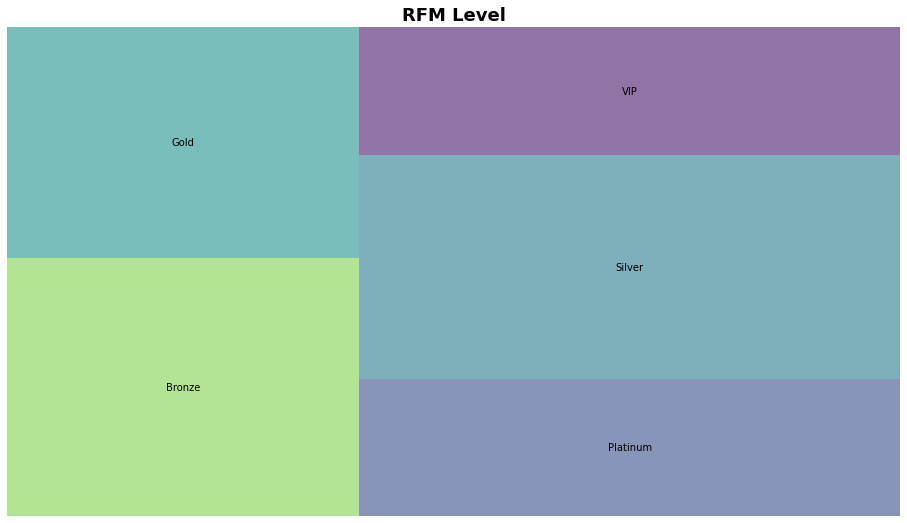

In [67]:
rfm_level_summary.columns = rfm_level_summary.columns.droplevel()
rfm_level_summary.columns = ['Recency_mean','Frequency_mean','Monetary_mean', 'Count']
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
squarify.plot(sizes=rfm_level_summary['Count'], 
              label=['Bronze',
                     'Gold',
                     'Platinum',
                     'Silver',
                     'VIP'], alpha=.6 )
plt.title("RFM Level", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

### Group customers by their RFM Type

In [68]:
rfm_segment_summary = rfm_segment.groupby('RFM_Type').agg({'recency (days)': 'mean',
                                                            'frequency (number)': 'mean',
                                                             'monetary (total)': ['mean', 'count']}).round(2)
rfm_segment_summary

recency (days) frequency (number) monetary (total)      
                              mean               mean             mean count
RFM_Type                                                                    
About to Sleep               71.12               4.12          2228.71   484
At Risk                     104.13               6.00          3344.73   196
Can’t Lose Them              91.08               7.88          4257.91   265
Champions                    14.64               8.45          4665.54   593
Hibernating                 166.38               3.37          1836.81   518
Loyal Customers              45.28               8.16          4533.61   258
Need Attention               46.73               6.00          3434.93   135
New Customers                 7.53               3.48          2065.45   163
Potential Loyalists          15.09               5.50          3003.46   465
Promising                    35.17               3.32          1815.39   338

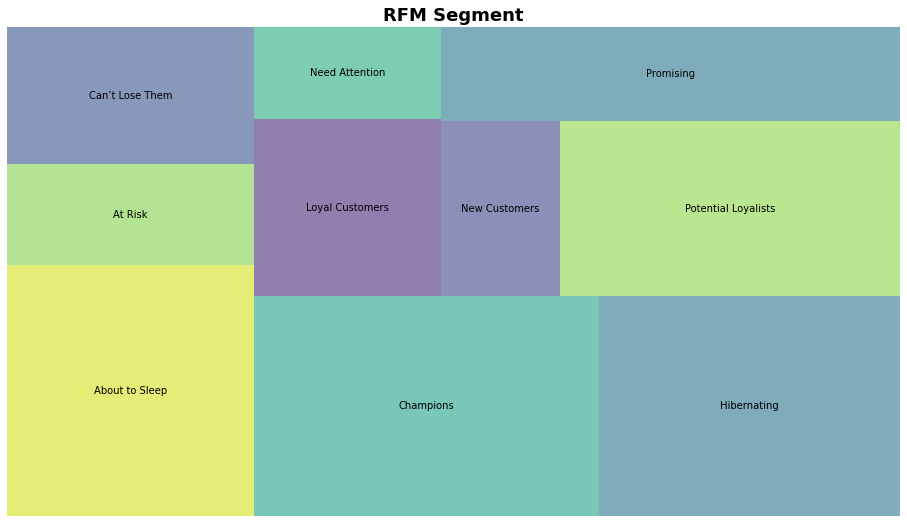

In [69]:
rfm_segment_summary.columns = rfm_segment_summary.columns.droplevel()
rfm_segment_summary.columns = ['Recency_mean','Frequency_mean','Monetary_mean', 'Count']
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
squarify.plot(sizes=rfm_segment_summary['Count'], 
              label=rfm_segment_summary.index.values, alpha=.6 )
plt.title("RFM Segment", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

#### Recency (days) by RFM Score

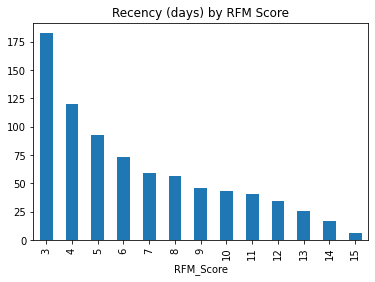

In [70]:
rfm_segment.groupby('RFM_Score')['recency (days)'].mean().plot.bar()
plt.title('Recency (days) by RFM Score')
plt.show()

#### Recency (days) by R Score

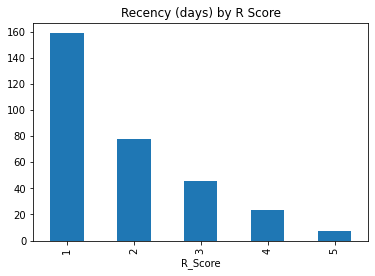

In [71]:
rfm_segment.groupby('R_Score')['recency (days)'].mean().plot.bar()
plt.title('Recency (days) by R Score')
plt.show()

#### Frequency (number) by RFM Score

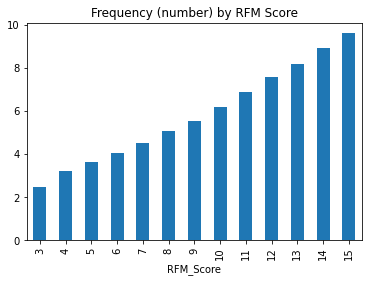

In [72]:
rfm_segment.groupby('RFM_Score')['frequency (number)'].mean().plot.bar()
plt.title('Frequency (number) by RFM Score')
plt.show()

#### Frequency (number) by F Score

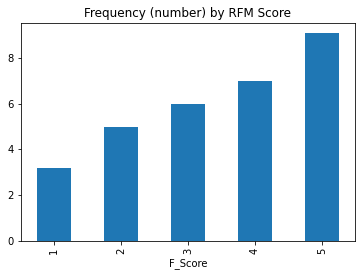

In [73]:
rfm_segment.groupby('F_Score')['frequency (number)'].mean().plot.bar()
plt.title('Frequency (number) by RFM Score')
plt.show()

#### Monetary (total) by RFM Score

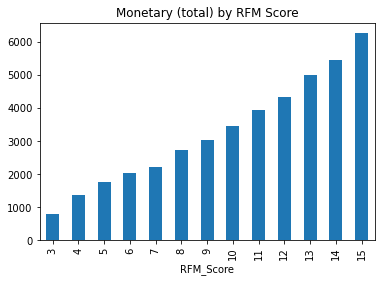

In [74]:
rfm_segment.groupby('RFM_Score')['monetary (total)'].mean().plot.bar()
plt.title('Monetary (total) by RFM Score')
plt.show()

#### Monetary (total) by M Score

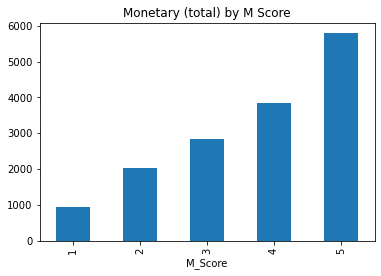

In [75]:
rfm_segment.groupby('M_Score')['monetary (total)'].mean().plot.bar()
plt.title('Monetary (total) by M Score')
plt.show()

### Save DataFrame as excel file

In [76]:
df_customers = pd.merge(df_customers, rfm_segment[['R_Score','F_Score','M_Score','RFM_Class','RFM_Score','RFM_Level', 'RFM_Type']], on='customer_id', how='left')
df_customers

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,...,Profit,number_purchases,last_purchase,R_Score,F_Score,M_Score,RFM_Class,RFM_Score,RFM_Level,RFM_Type
0,1,Female,93,Health,Mass Customer,Yes,11.0,2016.0,NSW,Australia,...,3018.09,11,7 days,5,5,3,553,13,VIP,Champions
1,2,Male,81,Financial Services,Mass Customer,Yes,16.0,2153.0,NSW,Australia,...,2226.26,3,128 days,1,1,2,112,4,Bronze,Hibernating
2,3,Male,61,Property,Mass Customer,Yes,15.0,2153.0,NSW,Australia,...,3362.81,8,102 days,1,5,4,154,10,Gold,Can’t Lose Them
3,4,Male,33,IT,Mass Customer,No,7.0,4211.0,QLD,Australia,...,220.57,2,195 days,1,1,1,111,3,Bronze,Hibernating
4,5,Female,56,Manufacturing,Affluent Customer,Yes,8.0,2448.0,NSW,Australia,...,2394.94,6,16 days,4,3,2,432,9,Gold,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,Male,99,Manufacturing,Mass Customer,Yes,19.0,2171.0,NSW,Australia,...,2045.84,4,256 days,1,1,2,112,4,Bronze,Hibernating
3411,3497,Female,73,Manufacturing,Affluent Customer,Yes,18.0,3976.0,VIC,Australia,...,1648.32,3,52 days,3,1,2,312,6,Silver,Promising
3412,3498,Female,28,Manufacturing,Mass Customer,No,5.0,3012.0,VIC,Australia,...,3147.33,6,127 days,1,3,3,133,7,Silver,At Risk
3413,3499,Male,29,Manufacturing,Mass Customer,Yes,7.0,4073.0,QLD,Australia,...,4955.25,7,51 days,3,4,5,345,12,Platinum,Loyal Customers


In [77]:
#df.to_excel('Clean_KPMG_data.xlsx')
with pd.ExcelWriter('Clean_KPMG_data.xlsx') as writer:
    df.to_excel(writer, sheet_name='Global')
    df_customers.to_excel(writer, sheet_name='Customers')
    rfm_segment.to_excel(writer, sheet_name='RFM')

### Histograms

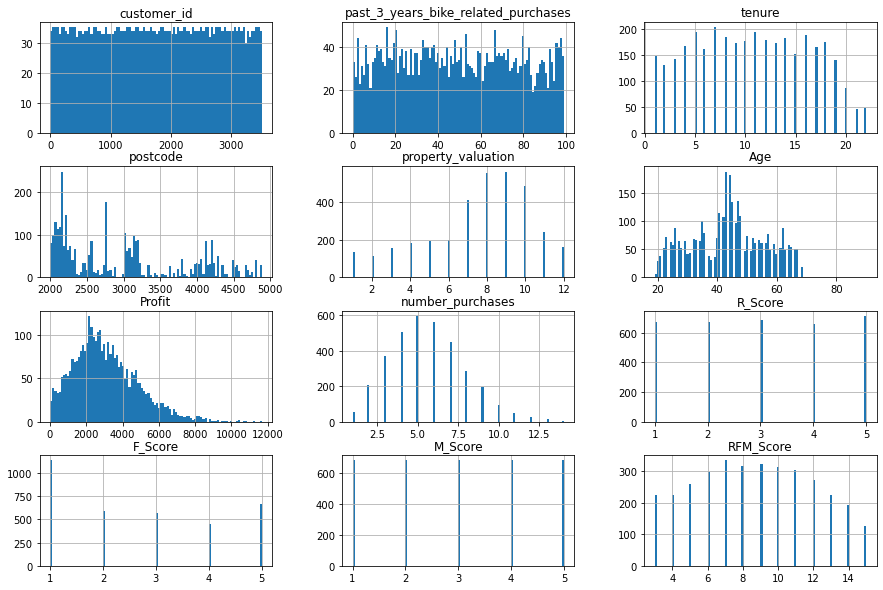

In [78]:
df_customers.hist(figsize=(15,10), bins=100)
plt.show()

### Data Exploratory Analysis

#### Wealth Segment Distribution

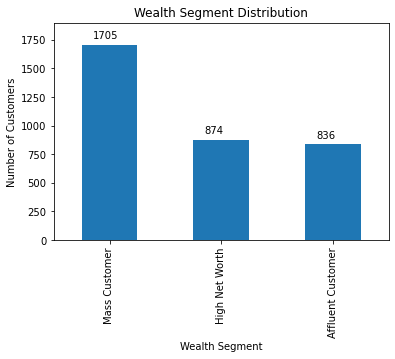

In [79]:
df_customers['wealth_segment'].value_counts().plot.bar()
j = 0
for i in df_customers['wealth_segment'].value_counts().values:
        plt.text(j-0.15, i+55, i, color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('Wealth Segment')
plt.title('Wealth Segment Distribution')
plt.ylim(0, 1900)
plt.show()

#### Wealth Segment Distribution by Gender

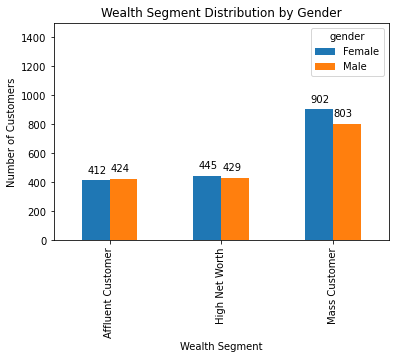

In [80]:
df_customers.groupby('wealth_segment')['gender'].value_counts().unstack(level=1).plot.bar()
j = 0
for i in df_customers.groupby('wealth_segment')['gender'].value_counts().unstack(level=1).values:
        plt.text(j - .2, i[0]+50, i[0], color='black')
        plt.text(j + .01, i[1]+50, i[1], color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('Wealth Segment')
plt.title('Wealth Segment Distribution by Gender')
plt.ylim(0, 1500)
plt.show()

#### Age Distribution by Gender

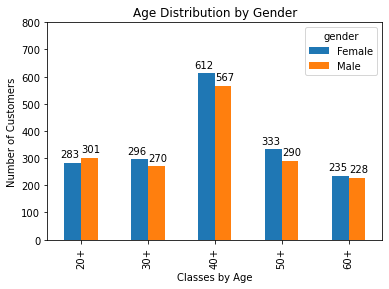

In [81]:
df_customers.groupby('Age_C')['gender'].value_counts().unstack(level=1).plot.bar()
j = 0
for i in df_customers.groupby('Age_C')['gender'].value_counts().unstack(level=1).values:
        plt.text(j - .3, i[0]+20, i[0], color='black')
        plt.text(j + .01, i[1]+20, i[1], color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('Classes by Age')
plt.title('Age Distribution by Gender')
plt.ylim(0, 800)
plt.show()

#### Number of Customers by State

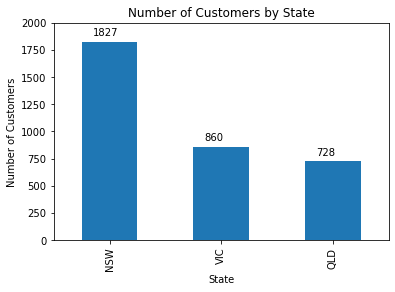

In [82]:
df_customers['state'].value_counts().plot.bar()
j = 0
for i in df_customers['state'].value_counts().values:
        plt.text(j-0.15, i+55, i, color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('State')
plt.title('Number of Customers by State')
plt.ylim(0, 2000)
plt.show()

#### Number of Customers by State with car

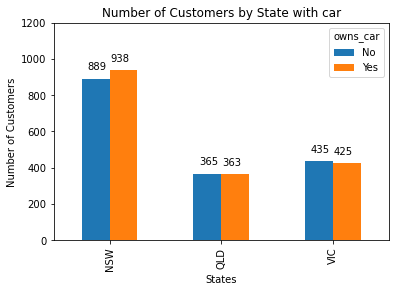

In [83]:
df_customers.groupby('state')['owns_car'].value_counts().unstack(level=1).plot.bar()
j = 0
for i in df_customers.groupby('state')['owns_car'].value_counts().unstack(level=1).values:
        plt.text(j - .2, i[0]+50, i[0], color='black')
        plt.text(j + .01, i[1]+50, i[1], color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('States')
plt.title('Number of Customers by State with car')
plt.ylim(0, 1200)
plt.show()

#### Number of Customers by State for Age

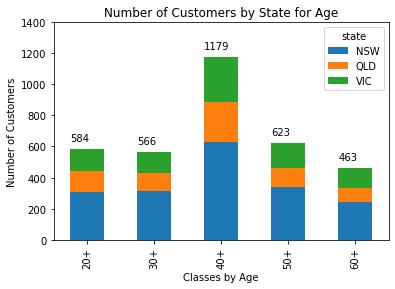

In [84]:
df_customers.groupby('Age_C')['state'].value_counts().unstack(level=1).plot.bar(stacked=True)
j = 0
for i in df_customers.groupby('Age_C').agg({'state': lambda x: len(x)})['state']:
        plt.text(j - .25, i+50, i, color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('Classes by Age')
plt.title('Number of Customers by State for Age')
plt.ylim(0, 1400)
plt.show()

#### Percent of Customers by job industry category

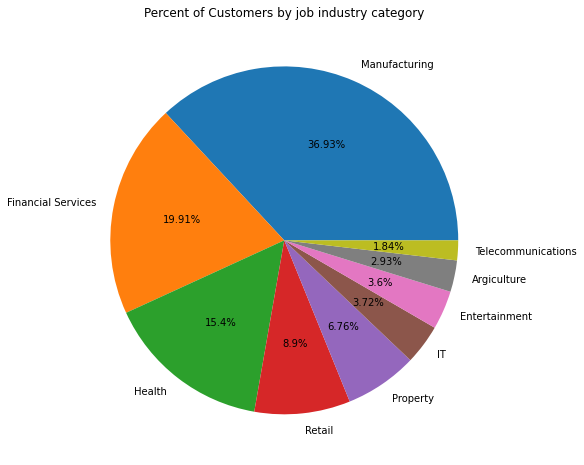

In [85]:
plt.figure(figsize=(8,8))
df_customers['job_industry_category'].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.ylabel('')
plt.title('Percent of Customers by job industry category')
plt.show()

#### Number of Customers by Gender

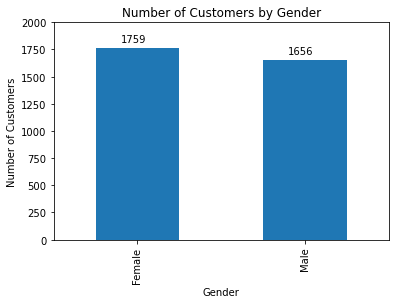

In [86]:
df_customers['gender'].value_counts().plot.bar()
j = 0
for i in df_customers['gender'].value_counts().values:
        plt.text(j-0.1, i+55, i, color='black')
        j += 1        
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.title('Number of Customers by Gender')
plt.ylim(0, 2000)
plt.show()

#### Number of Purchases by Age in the last 3 years

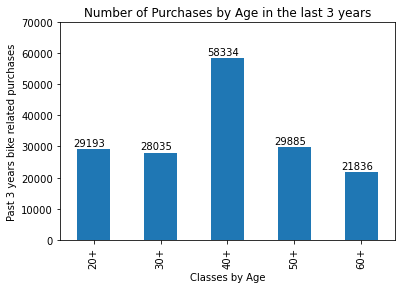

In [87]:
df_customers.groupby('Age_C')['past_3_years_bike_related_purchases'].sum().plot.bar()      
j = 0
for i in df_customers.groupby('Age_C')['past_3_years_bike_related_purchases'].sum().values:
        plt.text(j - 0.3, i+1000, i, color='black')
        j += 1  
plt.ylabel('Past 3 years bike related purchases')
plt.xlabel('Classes by Age')
plt.title('Number of Purchases by Age in the last 3 years')
plt.ylim(0, 70000)
plt.show()

#### Number of Purchases by Gender in the last 3 years

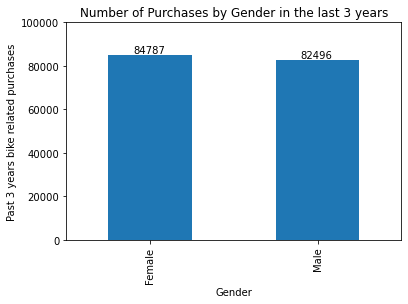

In [88]:
df_customers.groupby('gender')['past_3_years_bike_related_purchases'].sum().plot.bar() 
j = 0
for i in df_customers.groupby('gender')['past_3_years_bike_related_purchases'].sum().values:
        plt.text(j - 0.1, i+1000, i, color='black')
        j += 1  
plt.ylabel('Past 3 years bike related purchases')
plt.xlabel('Gender')
plt.title('Number of Purchases by Gender in the last 3 years')
plt.ylim(0, 100000)
plt.show()

#### Number the customers by Job industry category and M Score

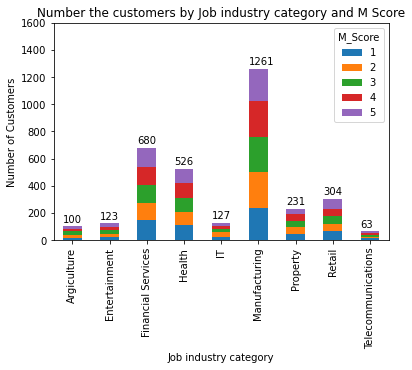

In [89]:
df_customers.groupby('job_industry_category')['M_Score'].value_counts().unstack(level=1).plot.bar(stacked=True) 
j = 0
for i in df_customers.groupby('job_industry_category')['RFM_Level'].count().values:
        plt.text(j - 0.25, i+30, i, color='black')
        j += 1  
plt.ylabel('Number of Customers')
plt.xlabel('Job industry category')
plt.title('Number the customers by Job industry category and M Score')
plt.ylim(0, 1600)
plt.show()

#### Number the customers by Job industry category and RFM Level

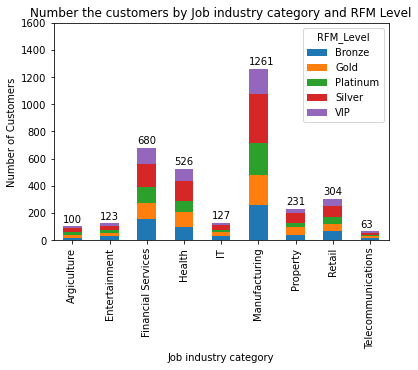

In [90]:
df_customers.groupby('job_industry_category')['RFM_Level'].value_counts().unstack(level=1).plot.bar(stacked=True) 
j = 0
for i in df_customers.groupby('job_industry_category')['RFM_Level'].count().values:
        plt.text(j - 0.25, i+30, i, color='black')
        j += 1  
plt.ylabel('Number of Customers')
plt.xlabel('Job industry category')
plt.title('Number the customers by Job industry category and RFM Level')
plt.ylim(0, 1600)
plt.show()

In [92]:
df_customers.groupby('RFM_Type')['job_industry_category'].value_counts().unstack(level=1)

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
RFM_Type,,,,,,,,,
About to Sleep,13,16,98,68,23,191,31,38,6
At Risk,8,10,31,29,11,75,9,21,2
Can’t Lose Them,13,9,49,35,8,98,22,24,7
Champions,17,19,130,96,14,220,36,51,10
Hibernating,13,22,114,71,19,188,27,50,14
Loyal Customers,3,10,41,47,10,98,13,31,5
Need Attention,3,6,19,22,8,52,13,10,2
New Customers,7,6,27,32,3,54,12,18,4
Potential Loyalists,13,12,103,73,19,162,34,38,11


#### Number the customers by State and RFM Level

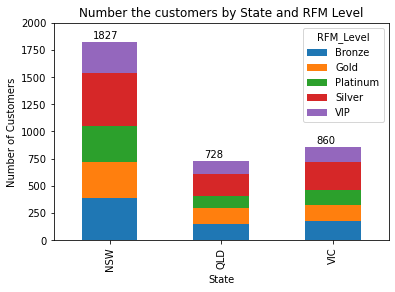

In [93]:
df_customers.groupby('state')['RFM_Level'].value_counts().unstack(level=1).plot.bar(stacked=True) 
j = 0
for i in df_customers.groupby('state')['RFM_Level'].count().values:
        plt.text(j - 0.15, i+30, i, color='black')
        j += 1  
plt.ylabel('Number of Customers')
plt.xlabel('State')
plt.title('Number the customers by State and RFM Level')
plt.ylim(0, 2000)
plt.show()

In [95]:
df_customers.groupby('RFM_Type')['state'].value_counts().unstack(level=1)

state,NSW,QLD,VIC
RFM_Type,,,
About to Sleep,253,109,122
At Risk,99,44,53
Can’t Lose Them,147,64,54
Champions,324,113,156
Hibernating,270,101,147
Loyal Customers,135,63,60
Need Attention,74,25,36
New Customers,87,37,39
Potential Loyalists,254,104,107


#### Number the customers by Age and RFM Level

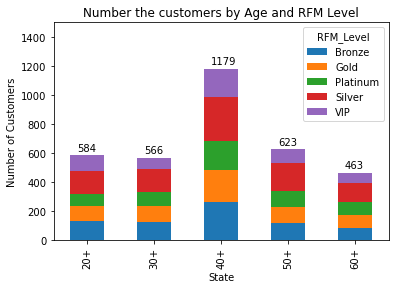

In [96]:
df_customers.groupby('Age_C')['RFM_Level'].value_counts().unstack(level=1).plot.bar(stacked=True) 
j = 0
for i in df_customers.groupby('Age_C')['RFM_Level'].count().values:
        plt.text(j - 0.15, i+30, i, color='black')
        j += 1  
plt.ylabel('Number of Customers')
plt.xlabel('State')
plt.title('Number the customers by Age and RFM Level')
plt.ylim(0, 1500)
plt.show()

In [97]:
df_customers.groupby('RFM_Type')['Age_C'].value_counts().unstack(level=1)

Age_C,20+,30+,40+,50+,60+
RFM_Type,,,,,
About to Sleep,84,93,149,93,65
At Risk,29,34,65,36,32
Can’t Lose Them,41,40,104,49,31
Champions,114,90,205,103,81
Hibernating,96,79,190,94,59
Loyal Customers,43,38,88,48,41
Need Attention,15,28,48,22,22
New Customers,30,33,45,31,24
Potential Loyalists,75,72,166,94,58


#### Number the customers by gender and RFM Level

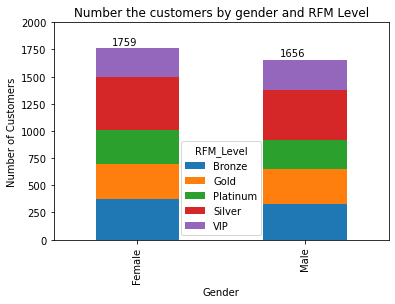

In [98]:
df_customers.groupby('gender')['RFM_Level'].value_counts().unstack(level=1).plot.bar(stacked=True) 
j = 0
for i in df_customers.groupby('gender')['RFM_Level'].count().values:
        plt.text(j - 0.15, i+30, i, color='black')
        j += 1  
plt.ylabel('Number of Customers')
plt.xlabel('Gender')
plt.title('Number the customers by gender and RFM Level')
plt.ylim(0, 2000)
plt.show()

In [99]:
df_customers.groupby('RFM_Type')['gender'].value_counts().unstack(level=1)

gender,Female,Male
RFM_Type,,
About to Sleep,251,233
At Risk,102,94
Can’t Lose Them,135,130
Champions,297,296
Hibernating,265,253
Loyal Customers,134,124
Need Attention,68,67
New Customers,82,81
Potential Loyalists,236,229
